Ana Luisa Pinheiro - 11810407 \\
Ayrton Amaral - 11288131 \\
Bruno Groper Morbin - 11809875 \\
Caio Febronio - 11811482


In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2

np.random.seed(123)

| p(X,Y) | X=1       | X=2        | X=3       | X=4 |
|-----|---------|----------|---------|---|
| Y=1   |   1/8   |   1/16      |   1/32     | 1/32 | 
| Y=2   |   1/16     |   1/8     |   1/32     | 1/32 |
| Y=3   |   1/16     |   1/16      |   1/16     | 1/16 |
| Y=4   |   1/4    |   0     |   0    |0 |

In [ ]:
joint_prob_xy = [1/8 , 1/16, 1/32, 1/32,
                 1/16, 1/8 , 1/32, 1/32,
                 1/16, 1/16, 1/16, 1/16,
                 1/4 , 0   , 0   , 0   ]

marginal_prob_x = [1/2, 1/4, 1/8, 1/8]

marginal_prob_y = [1/4, 1/4, 1/4, 1/4]

cond_prob_xy_temp =  [d/n for d,n in list(zip(joint_prob_xy,np.repeat(marginal_prob_y,4)))]
cond_prob_xy = {(y+1):cond_prob_xy_temp[i:i+4] for y,i in enumerate(range(0, len(cond_prob_xy_temp), 4))}

cond_prob_yx_temp =  [d/n for d,n in list(zip(joint_prob_xy,marginal_prob_x*4))]
cond_prob_yx = {(i+1):pd.DataFrame(cond_prob_yx_temp).iloc[[i,i+4,i+8,i+12],0].tolist() for i in range(0, 4)}

xy_labs = [str(b)+","+str(a) for a in range(1,5) for b in range(1,5)]

sample_size = int(1e6)
sample_df = pd.DataFrame({"X,Y":np.random.choice(a = xy_labs, size = sample_size, replace = True, p = joint_prob_xy).tolist()})

sample_df[['X','Y']] = sample_df["X,Y"].str.split(",", expand=True)

In [ ]:
empirical_prop_x = sample_df["X"].value_counts(normalize=True)
empirical_prop_y = sample_df["Y"].value_counts(normalize=True)
empirical_joint_prop_xy = sample_df["X,Y"].value_counts(normalize=True)

empirical_cond_prop_xy = {i:sample_df[sample_df["Y"]==str(i)]["X"].value_counts(normalize=True).to_dict() for i in range(1,5)}

empirical_cond_prop_yx = {i:sample_df[sample_df["X"]==str(i)]["Y"].value_counts(normalize=True).to_dict() for i in range(1,5)}

In [ ]:
# Empirical Entropy by sample with 1e6 observations based on original joint distribution given 
# and Theorical Entropy by given populational distribution

# Note: by convention, it is taken 0*log(0) = 0

empirical_Hx = -sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(empirical_prop_x)])
theorical_Hx = -sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(marginal_prob_x)])
print(f"Empirical H(X) = {empirical_Hx}\nTheorical H(X) = {theorical_Hx}\n")

empirical_Hy = -sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(empirical_prop_y)])
theorical_Hy = -sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(marginal_prob_y)])
print(f"Empirical H(Y) = {empirical_Hy}\nTheorical H(Y) = {theorical_Hy}\n")

empirical_Hxy = -sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(empirical_joint_prop_xy)])
theorical_Hxy = -sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(joint_prob_xy)])
print(f"Empirical H(X,Y) = {empirical_Hxy}\nTheorical H(X,Y) = {theorical_Hxy}\n")

Empirical H(X) = 1.750624009478404
Theorical H(X) = 1.75

Empirical H(Y) = 1.9999997930826598
Theorical H(Y) = 2.0

Empirical H(X,Y) = 3.3752203442909323
Theorical H(X,Y) = 3.375



Tem-se que: $$H(X|Y) = \sum_{y}p(y)H(X|Y=y)$$

In [ ]:
empirical_condHxy = sum(np.array([-sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(list(empirical_cond_prop_xy[i].values()))]) for i in empirical_cond_prop_xy])*empirical_prop_y)
theorical_condHxy = sum(np.array([-sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(cond_prob_xy[i])]) for i in cond_prob_xy])*marginal_prob_y)
print(f"Empirical H(X|Y) = {empirical_condHxy}\nTheorical H(X|Y) = {theorical_condHxy}\n")

empirical_condHyx = sum(np.array([-sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(list(empirical_cond_prop_yx[i].values()))]) for i in empirical_cond_prop_yx])*empirical_prop_x)
theorical_condHyx = sum(np.array([-sum([ele*math.log(ele,2) if ele!=0 else 0 for ele in np.array(cond_prob_yx[i])]) for i in cond_prob_yx])*marginal_prob_x)
print(f"Empirical H(Y|X) = {empirical_condHyx}\nTheorical H(Y|X) = {theorical_condHyx}\n")

Empirical H(X|Y) = 1.3751861670492884
Theorical H(X|Y) = 1.375

Empirical H(Y|X) = 1.6245963348125283
Theorical H(Y|X) = 1.625



Verifica-se que de fato respeita a relação: $$H(X,Y) = H(X) + H(Y|X) = H(Y) + H(X|Y)$$

In [ ]:
tabela14 = [(214,157),(237,269),(78,143),(119,79),
            (51,73),(102,124),(126,67),(22,37),
            (111,146),(304,250),(139,133),(48,73)]

lamb = 0.3
tabela14_lambda = [math.floor(o*lamb + e*(1-lamb)) for o,e in tabela14]

tab = tabela14_lambda
total_x = [tab[i]+tab[i+4]+tab[i+8] for i in range(4)]
total_y = [tab[i]+tab[i+1]+tab[i+2]+tab[i+3] for i in range(0,9,4)]

total = sum(total_x)

marginal_x = np.array(total_x)/total
marginal_y = np.array(total_y)/total

xy_labs = [str(b)+","+str(a) for a in range(1,4) for b in range(1,5)]


In [ ]:
pop_probs = pd.DataFrame({"X,Y":xy_labs,"p(x,y)":np.array(tabela14_lambda)/total, "p(x)*p(y)":[marginal_x[j]*marginal_y[i] for i in range(3) for j in range(4)]})
pop_probs

,"X,Y","p(x,y)",p(x)*p(y)
0,"1,1",0.112549,0.101512
1,"2,1",0.167529,0.173788
2,"3,1",0.079560,0.092308
3,"4,1",0.058862,0.050891
4,"1,2",0.042691,0.046912
5,"2,2",0.075679,0.080313
6,"3,2",0.054334,0.042659
7,"4,2",0.020699,0.023519
8,"1,3",0.087322,0.094138
9,"2,3",0.172057,0.161164


| Y\X | Consumidor (X=1)      | Produtor (X=2)        | Escola (X=3)       | Outras (X=4) |
|-----|---------|----------|---------|---|
| São Paulo (Y=1)  |   214 (157)   |   237 (269)      |   78 (143)     | 119 (79) | 
| Paraná (Y=2)  |   51 (73)    |  102 (124)    |  126 (67)   | 22 (37) |
| Rio G. Sul (Y=3)|  111 (146)    |    304 (250)      | 139 (133)     | 48 (73) |


Pela Informação Mútua: $$I(X,Y) = D(p(x,y)||p(x)p(y)) = \sum_{x,y}p(x,y)log\frac{p(x,y)}{p(x)p(y)}$$

In [ ]:
mutual_information = sum(pop_probs["p(x,y)"]*np.array([math.log(ele,2) if ele!=0 else 0 for ele in pop_probs["p(x,y)"]/pop_probs["p(x)*p(y)"]]))
print(f"I(X,Y) = {mutual_information}")

I(X,Y) = 0.0073581504728539105


Procede-se então com a geração de K amostras de tamanho N=1546 (total observado estipulado), porém com probabilidades conjuntas baseadas no cenário de independência ($H_0$), ou seja, $p(x,y) = p(x)p(y)$, resultando em K Informações Mútuas estimadas calculadas para cada uma das amostras.

In [ ]:
K = int(1e4)
N = total

joint_prob_independence = pop_probs["p(x)*p(y)"]

obs_mutual_information_list = list()

for i in range(K):
    sample_temp = pd.DataFrame({"X,Y": np.random.choice(a = xy_labs, size = N, replace = True, p = joint_prob_independence).tolist()})["X,Y"].value_counts()
    sample_temp = pd.DataFrame({'X,Y': sample_temp.index, 'count': sample_temp.values})
    sample_temp[['X','Y']] = sample_temp["X,Y"].str.split(",", expand=True)
    sample_temp['p(x,y)'] = sample_temp['count']/N

    obs_props_x_temp = {str(i):sum(sample_temp[sample_temp['X']==str(i)]['count'])/N for i in range(1,5)}
    obs_props_y_temp = {str(i):sum(sample_temp[sample_temp['Y']==str(i)]['count'])/N for i in range(1,5)}

    sample_temp['p(x)*p(y)'] = [obs_props_x_temp[x]*obs_props_y_temp[y] for x,y in zip(sample_temp['X'],sample_temp['Y'])]

    obs_mutual_information_temp = sum(sample_temp["p(x,y)"]*np.array([math.log(ele,2) if ele!=0 else 0 for ele in sample_temp["p(x,y)"]/sample_temp["p(x)*p(y)"]]))
    obs_mutual_information_list.append(obs_mutual_information_temp)

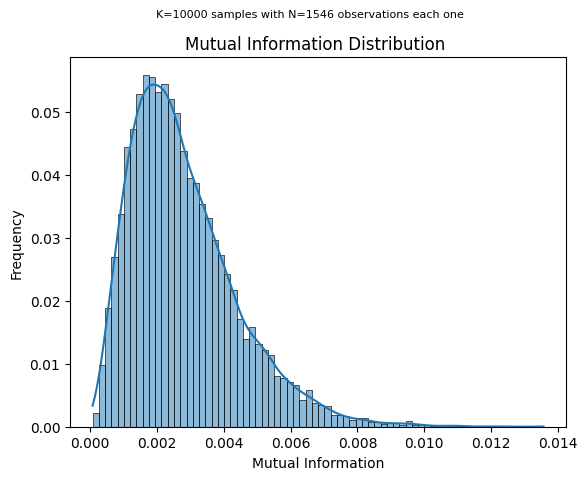

In [ ]:
sns.histplot(obs_mutual_information_list, kde = True, stat= 'probability')
plt.xlabel("Mutual Information")
plt.ylabel("Frequency")
plt.title("Mutual Information Distribution ")
plt.suptitle(f"K={K} samples with N={N} observations each one", fontsize=8)
plt.show()

Tem-se acima o gráfico da distribuição dos valores calculados da Informação Mútua das K amostras sendo cada uma com N=1546 observações sob o cenário de $H_0$, ou seja, com independência entre X e Y. Portanto, pode-se calcular a Informação Mútua do cenário específico a seguir e identificar qual p-valor apresenta. Se p-valor muito baixo, então tem-se uma amostra rara (considerando $H_0$) e então rejeita-se hipótese de independência.

In [ ]:
sample = pd.DataFrame({"X,Y":pop_probs["X,Y"],"count": tabela14_lambda})
sample[['X','Y']] = sample["X,Y"].str.split(",", expand=True)
sample['p(x,y)'] = sample['count']/N

obs_props_x = {str(i):sum(sample[sample['X']==str(i)]['count'])/N for i in range(1,5)}
obs_props_y = {str(i):sum(sample[sample['Y']==str(i)]['count'])/N for i in range(1,4)}

sample['p(x)*p(y)'] = [obs_props_x[x]*obs_props_y[y] for x,y in zip(sample['X'],sample['Y'])]

# Show the sample and respective proportions observed 
sample[['X','Y','X,Y','count','p(x,y)','p(x)*p(y)']]

,X,Y,"X,Y",count,"p(x,y)",p(x)*p(y)
0,1,1,"1,1",174,0.112549,0.101512
1,2,1,"2,1",259,0.167529,0.173788
2,3,1,"3,1",123,0.079560,0.092308
3,4,1,"4,1",91,0.058862,0.050891
4,1,2,"1,2",66,0.042691,0.046912
5,2,2,"2,2",117,0.075679,0.080313
6,3,2,"3,2",84,0.054334,0.042659
7,4,2,"4,2",32,0.020699,0.023519
8,1,3,"1,3",135,0.087322,0.094138
9,2,3,"2,3",266,0.172057,0.161164


In [ ]:
obs_mutual_information = sum(sample["p(x,y)"]*np.array([math.log(ele,2) if ele!=0 else 0 for ele in sample["p(x,y)"]/sample["p(x)*p(y)"]]))
# Mutual information observed in the sample
print(f"I(X,Y) observed: {obs_mutual_information}\n")

percentile = 95
percentile_mutual_information = np.percentile(obs_mutual_information_list, percentile)
print(f"{percentile}th percentile for I(X,Y) distribution: {percentile_mutual_information}")

I(X,Y) observed: 0.0073581504728539105

95th percentile for I(X,Y) distribution: 0.005862505609777752


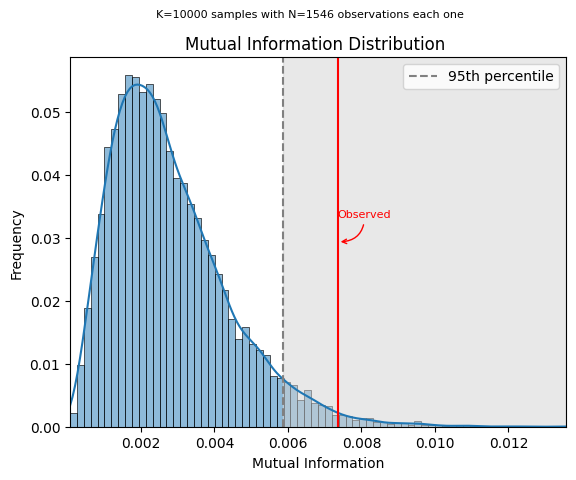

In [ ]:
sns.histplot(obs_mutual_information_list, kde = True, stat= 'probability')
plt.xlabel("Mutual Information")
plt.ylabel("Frequency")
plt.title("Mutual Information Distribution ")
plt.suptitle(f"K={K} samples with N={N} observations each one", fontsize=8)

# Adding the mutual information observed (red) and percentile determined (gray)
plt.axvline(x=obs_mutual_information, color='red', linestyle='solid')
plt.axvline(x=percentile_mutual_information, color='grey', linestyle='dashed', label=f"{percentile}th percentile")

plt.axvspan(xmin=percentile_mutual_information, xmax=np.array(obs_mutual_information_list).max(), color='lightgrey', alpha=0.5)

plt.xlim(np.array(obs_mutual_information_list).min(),np.array(obs_mutual_information_list).max())

ymax = plt.gca().get_ylim()[1]
plt.annotate('Observed', xy=(obs_mutual_information, ymax/2), xytext=(obs_mutual_information, ymax/2+ymax/15), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', color='red'), textcoords='data', color='red', fontsize=8, ha="left")

plt.legend()

plt.show()

Nota-se portanto que com valor da Informação Mútua da amostra especificada acima do percentil mostrado, infere-se que há indícios para rejeitar hipótese de independência entre as variáveis. Observa-se também que a distribuição é assimétrica à direita, podendo considerar $\text{p-valor} > 1-\text{percentil calculado}$. 

In [ ]:
# -----
# Na versão anterior, o erro estava aqui na linha abaixo 
# p_value = np.quantile(obs_mutual_information_list, (obs_mutual_information - min(obs_mutual_information_list))/(max(obs_mutual_information_list)-min(obs_mutual_information_list)))
# -----
p_value = (np.array(obs_mutual_information_list) >=  obs_mutual_information).sum()/len(obs_mutual_information_list)
print(f"p-value: {round(p_value*100,2)}%",end="")
alpha=0.05
if p_value<=alpha: print(f" <= {alpha*100}%\n---> Reject null hypothesis: X and Y aren't independent with {alpha*100}% of significance")
else: print(f' > {alpha*100}%\n---> NONE evidences to reject null hypothesis: X and Y are independent considering {alpha*100}% of significance')

p-value: 1.37% <= 5.0%
---> Reject null hypothesis: X and Y aren't independent with 5.0% of significance


Realiza-se a seguir um teste de independência clássico com a tabela de contigência especificada anteriormente. Para isso, nota-se que a tabela é composta por $r = 3$ linhas e $s = 4$ colunas implicando em um teste sob uma Qui-Quadrado $\chi^2(\nu)$ em $H_0$ (independência entre X e Y), onde $\nu = (r-1)(s-1)$ graus de liberdade, portanto, $6 g.l.$

In [ ]:
# Expected count assuming independence between X and Y
sample['count_expected'] = N*sample['p(x)*p(y)']

# To get statistic of the test, sum the elements for each entry by (count_observed - count_expected)^2/count_expected
test_statistic = sum((sample['count'] - sample['count_expected'])**2/sample['count_expected'])
print(f"The value of chi-square statistic of the test observed was: {test_statistic}")

The value of chi-square statistic of the test observed was: 16.109438836875455


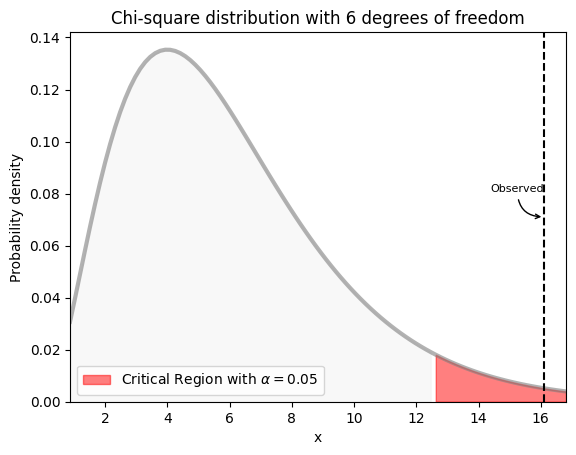

In [ ]:
# Plot density of Chi-Square distribution with 6 degrees of freedom
degrees_freedom = 6
x = np.linspace(chi2.ppf(0.01, degrees_freedom), chi2.ppf(0.99, degrees_freedom), 100)
chi2_dist = chi2(degrees_freedom)
plt.plot(x, chi2_dist.pdf(x), '-', lw=3, alpha=0.6, color="grey")
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title(f'Chi-square distribution with {degrees_freedom} degrees of freedom')

plt.fill_between(x, 0, chi2_dist.pdf(x), where=(x >= chi2.ppf(percentile/100, degrees_freedom)), alpha=0.5, color="red", label=f"Critical Region with $\\alpha={round(1-percentile/100,2)}$")
plt.fill_between(x, 0, chi2_dist.pdf(x), where=(x < chi2.ppf(percentile/100, degrees_freedom)), alpha=0.05, color="grey")

plt.axvline(test_statistic, color="black",linestyle='dashed')
ymax = plt.gca().get_ylim()[1]
plt.annotate('Observed', xy=(test_statistic, ymax/2), xytext=(test_statistic, ymax/2+ymax/15), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black'), textcoords='data', color='black', fontsize=8, ha="right")

plt.legend()

plt.xlim(min(x), max(x))
plt.ylim(0)

plt.show()

In [ ]:
# For the classic independence test
p_value_classic = 1 - chi2.cdf(test_statistic, degrees_freedom)
print(f"p-value: {round(p_value_classic*100,2)}%",end="")
if p_value_classic<=alpha: print(f" <= {alpha*100}%\n---> Reject null hypothesis: X and Y aren't independent with {alpha*100}% of significance")
else: print(f' > {alpha*100}%\n---> NONE evidences to reject null hypothesis: X and Y are independent considering {alpha*100}% of significance')

p-value: 1.32% <= 5.0%
---> Reject null hypothesis: X and Y aren't independent with 5.0% of significance


Portanto, infere-se também pelo teste clássico de independência que não rejeita-se hipótese nula de variáveis não dependentes com nível de significância de 5%, conforme esperado.